In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

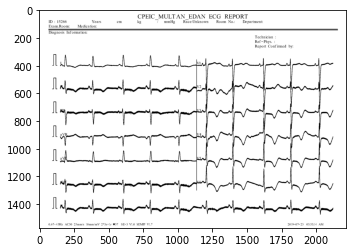

In [7]:
img=cv2.imread(r'C:\Users\Acer\Downloads\ECG Images of Patient that have History of MI (203)\PMI (169).jpg')
# img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret, thresh1 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1)

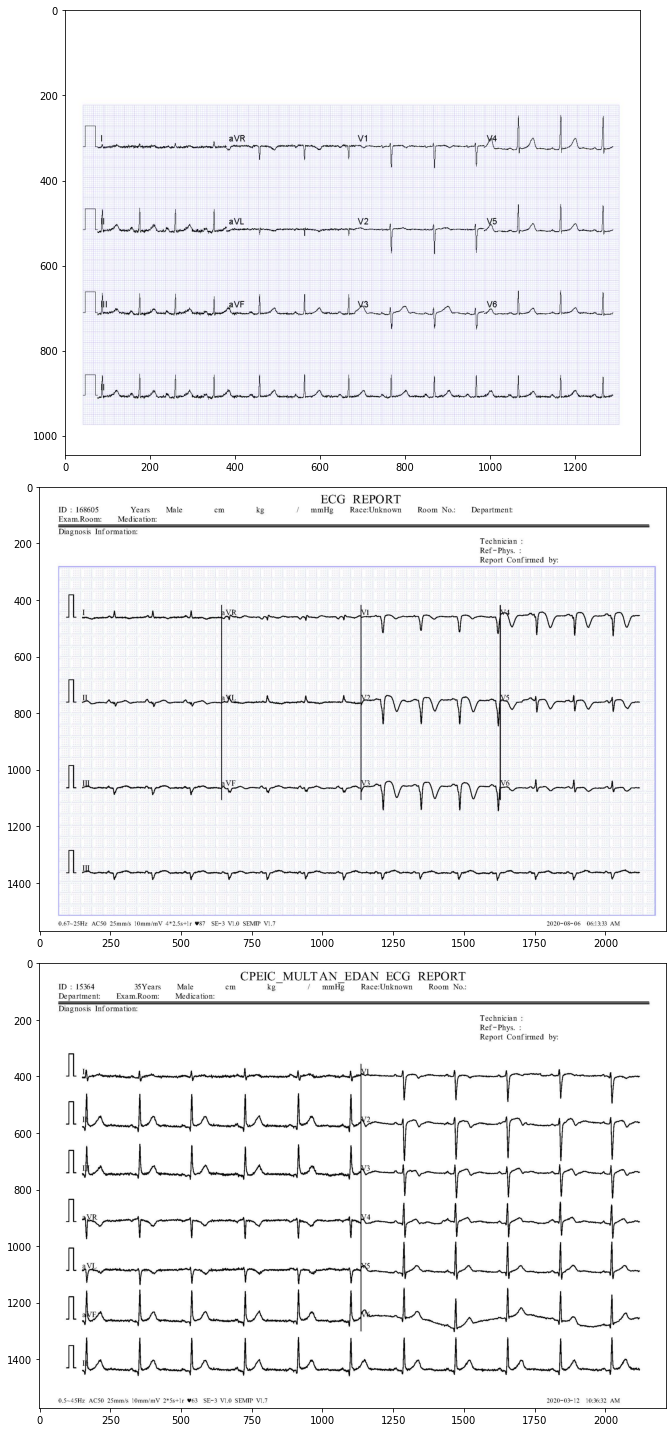

In [23]:
img1=cv2.imread(r'C:\Users\Acer\Downloads\ECG Images of COVID-19 Patients (250)\Binder1_Page_177.jpg')
img2=cv2.imread(r'C:\Users\Acer\Downloads\ECG Images of Patient that have History of MI (203)\PMI  (12).jpg')
img3=cv2.imread(r'C:\Users\Acer\Downloads\ECG Images of Patient that have History of MI (203)\PMI (197).jpg')
fig, (ax1, ax2 ,ax3 ) = plt.subplots(nrows=3,figsize=(10,20))
ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)
plt.tight_layout()
plt.show()

In [21]:
img1.mean(),img2.mean(),img2.mean(),

(243.73905873075765, 241.89096832005495, 241.89096832005495)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

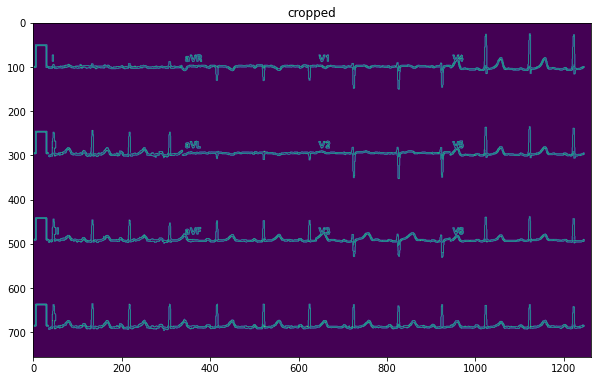

In [80]:
# cropping white edges of ECG paper
def crop(image):
    del_idx=[]
    img=image.copy()
    for i in range(img.shape[0]):
        if img[i].mean()>=252.0:
            del_idx.append(i)
    img=np.delete(img,del_idx,axis=0)
    del_idx=[]
    for i in range(img.shape[1]):
        if img[:,i].mean()>=251.0:
            del_idx.append(i)
    img=np.delete(img,del_idx,axis=1)
    # cv2.imshow('ii',img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    mid = cv2.Canny(blurred, 240, 250)
#     im_bw = cv2.threshold(mid, 150, 1, cv2.THRESH_BINARY)[1]
    plt.figure(figsize=(10,20))
    plt.title('cropped')
    plt.imshow(mid)
    return mid

from skimage.morphology import binary_erosion
binary_erosion(crop(img1))



In [30]:
#using canny method in cv2 can help us detect edges with differnt intensity

image=img.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# show the original and blurred images
cv2.imshow("Original", image)
cv2.imshow("Blurred", blurred)
wide = cv2.Canny(blurred, 10, 200)
mid = cv2.Canny(blurred, 30, 150)
tight = cv2.Canny(blurred, 240, 250)
# show the output Canny edge maps
cv2.imshow("Wide Edge Map", wide)
cv2.imshow("Mid Edge Map", mid)
cv2.imshow("Tight Edge Map", tight)
cv2.waitKey(0)

-1

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


array([[  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255,   0, ...,   0,   0,   0],
       [  0, 255, 255, ...,   0, 255, 255],
       [  0, 255,   0, ...,   0, 255,   0]], dtype=uint8)

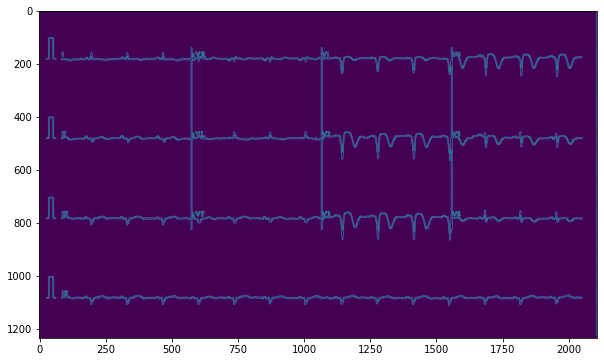

In [65]:
def crop2(image):
    # convert to grayscale
    img=image.copy()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # threshold
    thresh = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY_INV)[1]

    # apply morphology
    kernel = np.ones((7,7), np.uint8)

    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
#     plt.imshow(morph)


    contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    contours = contours[0] if len(contours) == 2 else contours[1]
    area_thresh = 0
    for c in contours:
        area = cv2.contourArea(c)
        if area > area_thresh:
            area_thresh = area
            big_contour = c
    cv2.contourArea(big_contour)
    
    # get bounding box
    x,y,w,h = cv2.boundingRect(big_contour)

    # draw filled contour on black background
    mask = np.zeros_like(gray)
    print(mask)
    mask = cv2.merge([mask,mask,mask])
    cv2.drawContours(mask, [big_contour], -1, (255,255,255), cv2.FILLED)

    # apply mask to input
    result1 = image.copy()
    result1 = cv2.bitwise_and(result1, mask)

    # crop result
    result2 = result1[y:y+h, x:x+w]
    gray=cv2.cvtColor(result2,cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    mid = cv2.Canny(blurred, 240, 250)
    
    plt.figure(figsize=(10,20))
    plt.imshow(mid)
    return mid
# view result
# cv2.imshow("threshold", thresh)
# cv2.imshow("morph", morph)
# cv2.imshow("mask", mask)
# cv2.imshow("result1", result1)
# cv2.imshow("result2", result2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# save result
# cv2.imwrite("paper_thresh.jpg", thresh)
# cv2.imwrite("paper_morph.jpg", morph)
# cv2.imwrite("paper_mask.jpg", mask)
# cv2.imwrite("paper_result1.jpg", result1)
# cv2.imwrite("paper_result2.jpg", result2)
crop2(img2)

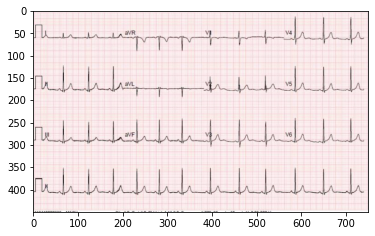

In [191]:
#we can resize it to a fix scale to grid
plt.imshow(cv2.resize(img,(750,450)))

In [160]:
if img<=123:
    img=255.0

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

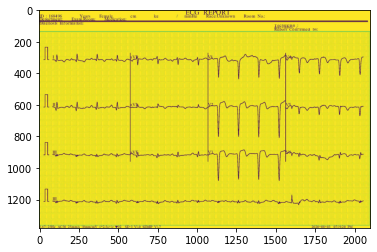

In [229]:
plt.imsave('cropped ecg.jpg',cv2.cvtColor(img,cv2.COLOR_RGB2GRAY))
plt.imread('cropped ecg.jpg')
plt.imshow(plt.imread('cropped ecg.jpg'))


In [8]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)

In [81]:
# #display inference on ALL test images

# import glob
# from IPython.display import Image, display

# for imageName in glob.glob(r'C:\Users\Acer\Downloads\ECG Images of COVID-19 Patients (250)\*.jpg'): #assuming JPG
# #     display(Image(filename=imageName))
# #     plt.imshow(plt.imread(imageName))
#     print(imageName,"\n")

In [16]:
import numpy as np
def crop(image):
    y_nonzero, x_nonzero, _ = np.nonzero(image)
    return image[np.min(y_nonzero):np.max(y_nonzero), np.min(x_nonzero):np.max(x_nonzero)]